# Lab 4 - Linear models

We focus on models in the form 

$$ y ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

or in generalized form (generalized linear models)

$$ f(y) ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

where $f(y)$ is a link function, for example - logit.


In [86]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [87]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [88]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


#### Task 1. Prior predictive checks

1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors
4. Check if observed data is possible to obtain using priors.

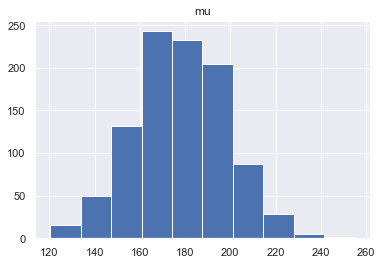

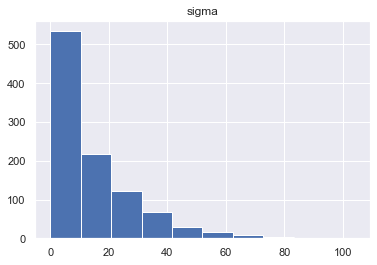

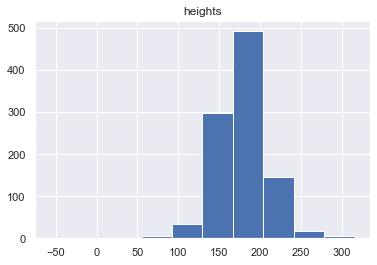

In [89]:
# print(dir(sim.generated_quantities))
# print(dir(sim.stan_variables))
# print(dir(sim))

# PLOTTING HISTOGRAMS
plt.hist(sim.stan_variable('mu'))
plt.title('mu')
plt.show()
plt.hist(sim.stan_variable('sigma'))
plt.title('sigma')
plt.show()
plt.hist(sim.stan_variable('heights'))
plt.title('heights')
plt.show()

C:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


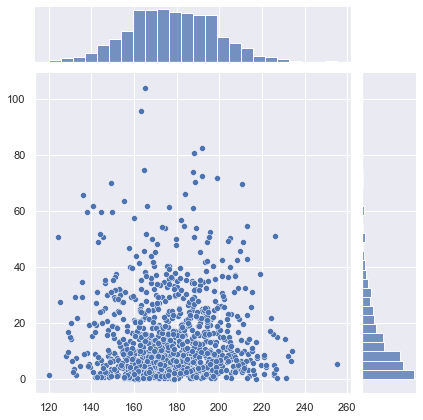

In [90]:
#JOINT DISTRIBIUTION
sns.set()
sns.jointplot(sim.stan_variable('mu'), sim.stan_variable('sigma'))
plt.show()

In [91]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [92]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)
# dict(N=len(d), heights=d.height.values)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


#### Task 2. Model fit and evaluation

1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



C:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


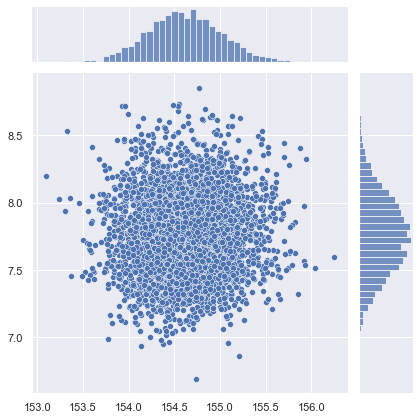

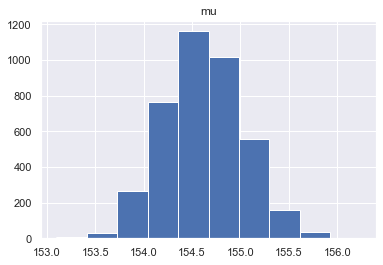

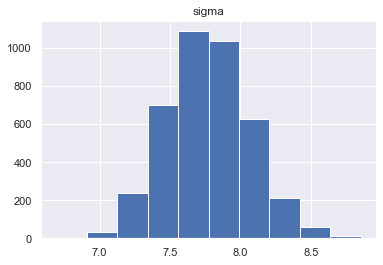

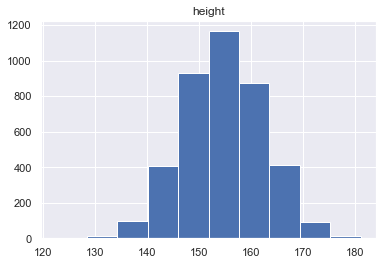

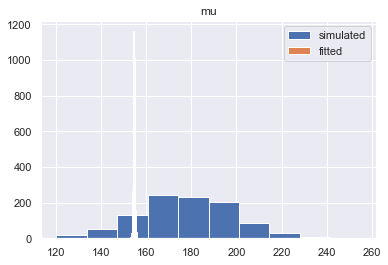

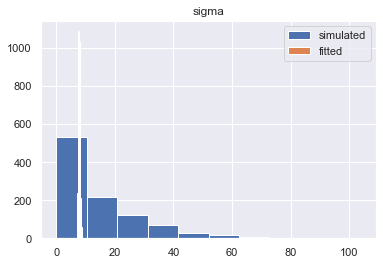

In [93]:
#JOINT DISTRIBIUTION
sns.set()
sns.jointplot(fit.stan_variable('mu'), fit.stan_variable('sigma'))
plt.show()


# PLOTTING HISTOGRAM
plt.hist(fit.stan_variable('mu'))
plt.title('mu')
plt.show()
plt.hist(fit.stan_variable('sigma'))
plt.title('sigma')
plt.show()
plt.hist(fit.stan_variable('height'))
plt.title('height')
plt.show()

plt.hist(sim.stan_variable('mu'), label='simulated')
plt.hist(fit.stan_variable('mu'), label='fitted')
plt.legend()
plt.title('mu')
plt.show()

plt.hist(sim.stan_variable('sigma'), label='simulated')
plt.hist(fit.stan_variable('sigma'), label='fitted')
plt.legend()
plt.title('sigma')
plt.show()
## QUALITY EVALUATION

### Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [94]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')

d = d.assign(c_weight = d.weight - d.weight.mean())
print(d.head())

R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)



INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab4\height_2a_ppc.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab4\height_2a_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab4\height_2a_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab4/height_2a_ppc.hpp C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab4/height_2a_ppc.stan
Warning in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab4/height_2a_ppc.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN

    height     weight   age  male   c_weight
0  151.765  47.825606  63.0     1   2.835121
1  139.700  36.485807  63.0     0  -8.504679
2  136.525  31.864838  65.0     0 -13.125648
3  156.845  53.041914  41.0     1   8.051429
4  145.415  41.276872  51.0     0  -3.713614


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 4. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

[[ 126.945      96.8011    139.823     166.994     196.811     171.831
   167.252     173.326     163.977     200.002     166.674     172.457
   223.281     185.437     181.179     206.529     203.322     212.745
   229.954     240.876     219.734     232.551     195.749     242.715
   230.424     277.965     252.305     256.973     280.574     280.786
   210.014     304.96      298.186     312.129     286.209     288.518
   316.815     317.289     290.724     345.634     353.491     375.266
   372.359     347.726     314.671     339.322     350.567     379.672
   373.631     387.01    ]
 [ 155.071     154.987     154.941     154.935     154.894     154.813
   154.767     154.514     154.809     154.692     154.456     154.523
   154.485     154.471     154.394     154.277     154.29      154.208
   154.054     154.188     154.235     154.009     153.826     153.982
   153.915     153.779     153.909     153.771     153.761     153.633
   153.718     153.636     153.481     153.494    

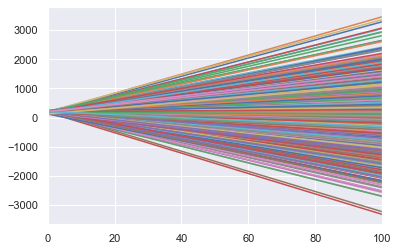

In [95]:
x2 = np.array([0, 100])

for alpha, beta in zip(sim.stan_variable('alpha'), sim.stan_variable('beta')):
    x = np.array([0, 100])
    y = alpha + beta * x2
    plt.plot(x, y)
    plt.xlim([0, 100])
print(sim.stan_variable('height')[:10])

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

## Min and max value are not the same that will occur in the nature

### Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [99]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab4\height_2b_ppc.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab4\height_2b_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab4\height_2b_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab4/height_2b_ppc.hpp C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab4/height_2b_ppc.stan
Warning in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab4/height_2b_ppc.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN

In [100]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 5. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

[[204.845  171.055  210.431  233.956  260.127  231.501  223.276  225.704
  212.71   245.089  208.115  210.252  257.431  215.941  208.037  229.74
  222.887  228.665  242.228  249.504  224.716  233.887  193.44   236.759
  220.823  264.718  235.412  236.434  256.389  252.955  178.537  269.838
  259.417  269.715  240.149  238.812  263.463  260.291  230.08   281.344
  285.555  303.685  297.132  268.853  232.152  253.157  260.757  286.215
  276.528  286.262 ]
 [140.302  140.909  141.555  142.24   142.89   143.5    144.145  144.583
  145.57   146.144  146.599  147.357  148.01   148.688  149.302  149.876
  150.58   151.19   151.727  152.553  153.29   153.755  154.264  155.111
  155.736  156.291  157.112  157.665  158.346  158.91   159.686  160.295
  160.831  161.536  162.032  162.756  163.596  164.063  164.759  165.491
  166.311  166.723  167.294  168.006  168.584  169.359  169.87   170.599
  171.368  171.895 ]
 [193.841  161.38   162.156  177.948  173.857  184.016  122.963  170.953
  120.781 

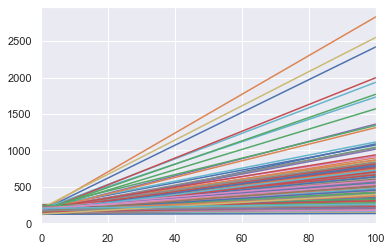

In [115]:
x2 = np.array([0, 100])

for alpha, beta in zip(sim.stan_variable('alpha'), sim.stan_variable('beta')):
    x = np.array([0, 100])
    y = alpha + beta * x2
    plt.plot(x, y)
    plt.xlim([0, 100])
print(sim.stan_variable('height')[:10])

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))


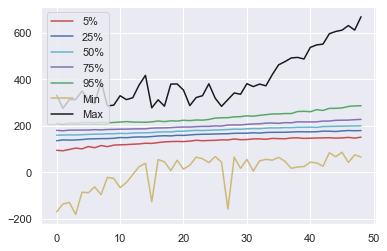

In [128]:
q5 = []
q25 =[]
q50 = []
q75 =[]
q95 =[]
maxim = []
minim =[]

for i in range(1,50):
    q5.append(np.quantile(sim.stan_variable('height')[:,i],0.05))
    q25.append(np.quantile(sim.stan_variable('height')[:,i],0.25))
    q50.append(np.quantile(sim.stan_variable('height')[:,i],0.5))
    q75.append(np.quantile(sim.stan_variable('height')[:,i],0.75))
    q95.append(np.quantile(sim.stan_variable('height')[:,i],0.95))
    maxim.append(np.max(sim.stan_variable('height')[:,i]))
    minim.append(np.min(sim.stan_variable('height')[:,i]))

plt.plot(q5, color='r')
plt.plot(q25, color='b')
plt.plot(q50, color='c')
plt.plot(q75, color='m')
plt.plot(q95, color='g')
plt.plot(minim, color='y')
plt.plot(maxim, color='k')
plt.grid(True)
plt.legend(['5%','25%','50%','75%','95%','Min', 'Max'])
plt.show()
# median = []
# for i in range(len(x)):
#     median.append(np.quantile(y[:,i]), 0.5)

### Fitting data


In [129]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


#### Task 6. Preparing data for fit
1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe

In [130]:
N = 100

data_fit = {
    "N": N, 
    "weight": d['weight'][0:N],
    "heights": d['height'][0:N]
}

fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed       


INFO:cmdstanpy:CmdStan done processing.


#### Task 7. Evaluating model

1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


max:  194.313
min:  119.406


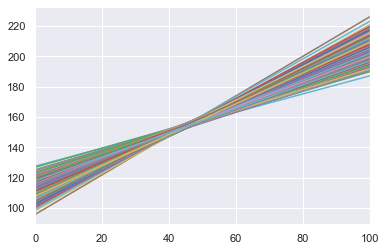

In [132]:
x2 = np.array([0, 100])

for alpha, beta in zip(fit.stan_variable('alpha'), fit.stan_variable('beta')):
    x = np.array([0, 100])
    y = alpha + beta * x2
    plt.plot(x, y)
    plt.xlim([0, 100])

print('max: ', np.max(fit.stan_variable('height')))
print('min: ', np.min(fit.stan_variable('height')))

According to max and min values fitting model is ok

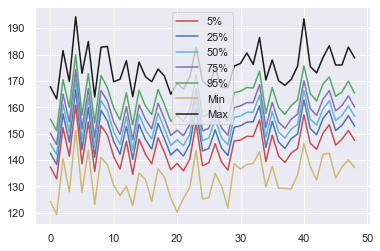

In [133]:
q5 = []
q25 =[]
q50 = []
q75 =[]
q95 =[]
maxim = []
minim =[]

for i in range(1,50):
    q5.append(np.quantile(fit.stan_variable('height')[:,i],0.05))
    q25.append(np.quantile(fit.stan_variable('height')[:,i],0.25))
    q50.append(np.quantile(fit.stan_variable('height')[:,i],0.5))
    q75.append(np.quantile(fit.stan_variable('height')[:,i],0.75))
    q95.append(np.quantile(fit.stan_variable('height')[:,i],0.95))
    maxim.append(np.max(fit.stan_variable('height')[:,i]))
    minim.append(np.min(fit.stan_variable('height')[:,i]))

plt.plot(q5, color='r')
plt.plot(q25, color='b')
plt.plot(q50, color='c')
plt.plot(q75, color='m')
plt.plot(q95, color='g')
plt.plot(minim, color='y')
plt.plot(maxim, color='k')
plt.grid(True)
plt.legend(['5%','25%','50%','75%','95%','Min', 'Max'])
plt.show()
# median = []
# for i in range(len(x)):
#     median.append(np.quantile(y[:,i]), 0.5)